<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot. 
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [1]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [2]:
image = np.array(Image.open('../../Images/lemon.jpeg'))

## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image 
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





Shape of original image : (100, 100, 3)
Shape of last channel : (100, 100)


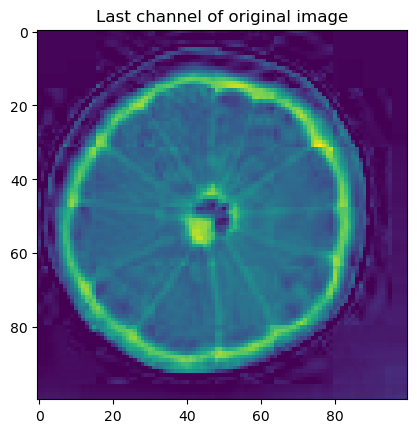

In [3]:
# 1. Printing shape of image
print("Shape of original image :",image.shape)

# 2. Creating new variable and assigning last color channel of original image
img_single_channel = image[:,:,-1]

# 3. Printing the shape 
print("Shape of last channel :",img_single_channel.shape)

# 4. Displaying the image
plt.imshow(img_single_channel)
plt.title("Last channel of original image")
plt.show()

## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

Shape of average image :  (100, 100)


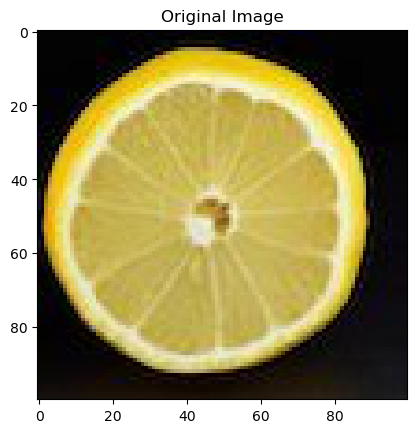

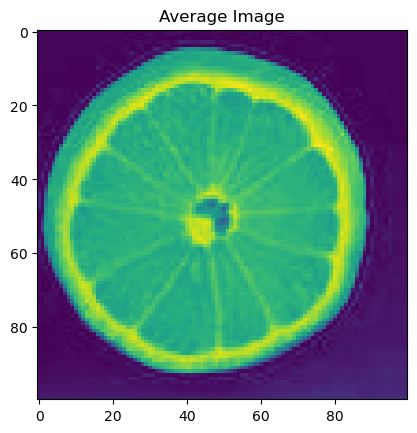

In [4]:
# 1. Creating a new variable and assigning average of all three color
img_average_channel = np.mean(image, axis=2)

# 2. Prinitng the shape.
print("Shape of average image : ", img_average_channel.shape)

# 3. Displaying the average image
plt.imshow(image)
plt.title("Original Image")
plt.show()

plt.imshow(img_average_channel)
plt.title("Average Image")
plt.show()


# The average image is much more clear in terms of pixel then the last channel image.
# so, the average image is much better then last channel image

## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

In [5]:
# 1. Identity matrix is a special square matrix which on consists of ones and zeros and ones are located 
# in the primary diagonal of the matrix. It's usually denoted by I. If you multiply any matrix A with identity 
# matrix I, it will return the same matrix A only if matrix multiplication is valid one.

# 2. Creating the identity_matrix  of same size as average channel.
shape = img_average_channel.shape
identity_matrix = np.identity(shape[0])

# 3. Printing the random row
row = np.random.randint(0,shape[0])
print(identity_matrix[row])
# This prints the value 1 in a row which is same number that's generated by the random function.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`. 

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [6]:
# 1. Creating an array 
shape = img_average_channel.shape
rows = np.arange(0,shape[0])

# 2. Shuffling the values 
np.random.shuffle(rows)

# 3. Printing the shuffled array
print(rows)

[82 52 35 65 97 17 62 53 41  4 67 63 51 33 31 94 59 49 93  6  0 42 79 21
 27 10  7 36 64  8 57 55 22 96 14 48 99 28 66 32 12 26 39 76 60 20 84 43
 13 40 45 89 61 44 98  3 75 95 85 71 37 38 91 16 90 19 88 23 81 72 68 34
  2 73 56 15 24 46 29 70 54 78  1  9 80  5 18 74 47 77 25 92 83 50 58 69
 30 86 87 11]


## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [7]:
# 1. Creating matrix T as per needs.
T = identity_matrix[rows,]

# 2. We are rearranging the rows of identity matrix using the rows arrays.

# 3. Printing the shape of matrix T
print("Shape of matrix T : ",T.shape)

Shape of matrix T :  (100, 100)


## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see. 
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image. 

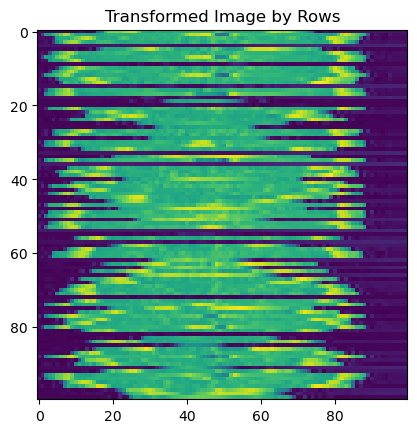

In [8]:
# 1. Doing the matrix multiplication
transformed_image = np.dot(T,img_average_channel)

# 2. Displaying the image
plt.imshow(transformed_image)
plt.title("Transformed Image by Rows")
plt.show()

# 3. Each dot product is resulting into a single row out of the average image.
#The image is just the rearrangement of the original average image by rows

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

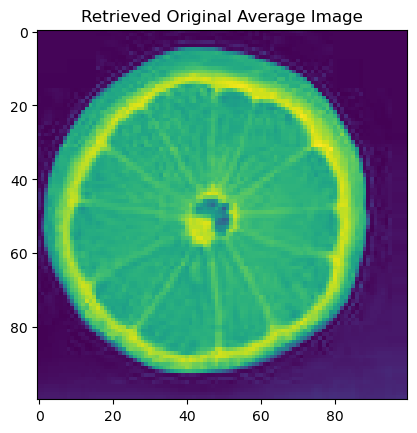

In [9]:
# 1. If ther determinant of the matrix  T is not zero, that means it's invertible otherwise not.

# 2. Computing the inverse.
determinant = np.linalg.det(T)

# 3. Retrieving the original image.
if determinant != 0:
    # Matrix T is invertible
    
    T_inv = np.linalg.inv(T)
    # 3. Retrieving the original image
    oringinal_image = np.dot(T_inv, transformed_image)
    plt.imshow(oringinal_image)
    plt.title("Retrieved Original Average Image")
    plt.show()
    
else:
    print("Matrix is not invertible")
    



## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


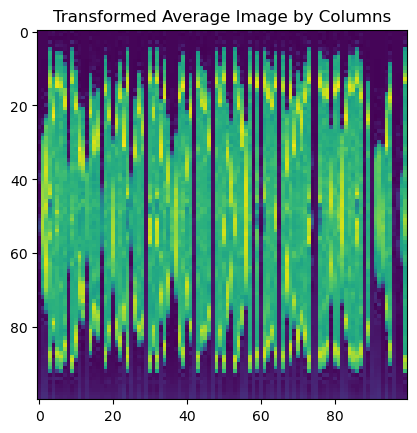

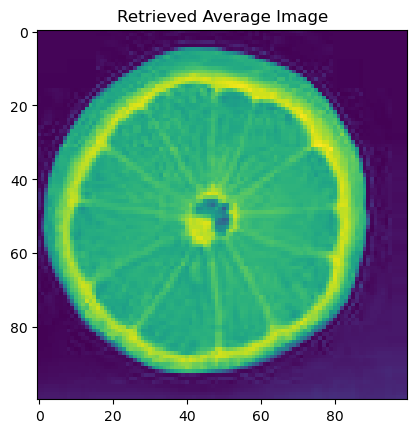

In [10]:
# Doing the same operation but this time we have to shuffle columns instead of rows.

shape = img_average_channel.shape

cols = np.arange(shape[1])
np.random.shuffle(cols)

T_cols = identity_matrix[:,cols]

transformed_image_cols = np.dot(img_average_channel, T_cols)
plt.imshow(transformed_image_cols)
plt.title("Transformed Average Image by Columns")
plt.show()

determinant = np.linalg.det(T_cols)

if determinant != 0:
    T_inv_col = np.linalg.inv(T_cols)
    
    original_image = np.dot(transformed_image_cols,T_inv_col)
    plt.imshow(original_image)
    plt.title("Retrieved Average Image")
    plt.show()
else :
    print("Matrix is not inveritble")

## Part 9 : Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image. 

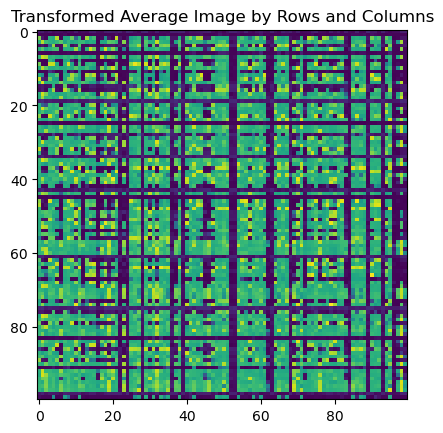

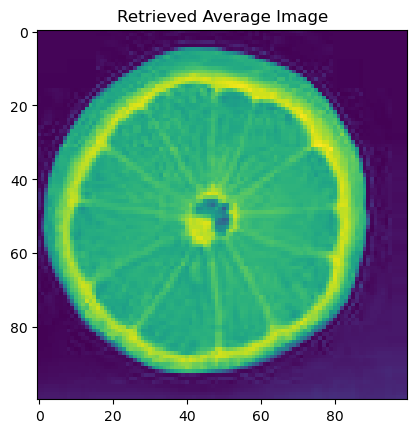

In [11]:
# Doing the same operation but this time we have to shuffle both rows and columns.

shape = img_average_channel.shape
rows = np.arange(shape[0])
cols = np.arange(shape[1])
np.random.shuffle(rows)
np.random.shuffle(cols)

T_rows = identity_matrix[rows,]
T_cols = identity_matrix[:,cols]

transformed_image = np.dot(np.dot(T_rows,img_average_channel), T_cols)
plt.imshow(transformed_image)
plt.title("Transformed Average Image by Rows and Columns")
plt.show()

determinant_row = np.linalg.det(T_rows)
determinant_col = np.linalg.det(T_cols)
if determinant_row != 0 and determinant_col != 0:
    T_inv_row = np.linalg.inv(T_rows)
    T_inv_col = np.linalg.inv(T_cols)
    
    original_image = np.dot(np.dot(T_inv_row,transformed_image),T_inv_col)
    plt.imshow(original_image)
    plt.title("Retrieved Average Image")
    plt.show()
else :
    print("Matrix is not inveritble")